<a href="https://colab.research.google.com/github/kimsojeong1225/Algorithm/blob/master/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9Cchap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [0]:
import pandas as pd

iris=load_iris()

iris_data=iris.data

iris_label=iris.target
print('iris target값:',iris_label)
print('iris target명:',iris.target_names)

iris_df=pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [0]:
X_train,X_test,y_train,y_test = train_test_split(iris_data,iris_label,test_size=0.2,random_state=11)

In [0]:
dt_clf=DecisionTreeClassifier(random_state=11)

In [0]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

In [0]:
pred=dt_clf.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score
print('예측 정확도:{0:4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.933333


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf=DecisionTreeClassifier()
iris_data=load_iris()

X_train,x_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.3,random_state=121)

In [0]:
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(x_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.9556


In [0]:
from sklearn.model_selection import KFold
import numpy as np

iris=load_iris()
features = iris.data
label=iris.target
dt_clf=DecisionTreeClassifier(random_state=156)

kfold=KFold(n_splits=5)
cv_accuracy=[]
print('붖꽃 데이터 세트 크기:',features.shape[0])

붖꽃 데이터 세트 크기: 150


In [0]:
n_iter=0

for train_index,test_index in kfold.split(features):
  X_train,X_test=features[train_index],features[test_index]
  y_train,y_test=label[train_index],label[test_index]

  dt_clf.fit(X_train,y_train)
  pred=dt_clf.predict(X_test)
  n_iter +=1

  accuracy=np.round(accuracy_score(y_test,pred),4)
  train_size=X_train.shape[0]
  test_size=X_test.shape[0]
  print('\n#{0}교차 검증 정확도:{1}, 학습 데이터 크기:{2}, 검증 데이터 크기: {3}'.format(n_iter,accuracy,train_size,test_size))
  print('\n#{0}검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

print('\n## 평균 검증 정확도: ',np.mean(cv_accuracy))


#1교차 검증 정확도:1.0, 학습 데이터 크기:120, 검증 데이터 크기: 30

#1검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2교차 검증 정확도:0.9667, 학습 데이터 크기:120, 검증 데이터 크기: 30

#2검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3교차 검증 정확도:0.8667, 학습 데이터 크기:120, 검증 데이터 크기: 30

#3검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4교차 검증 정확도:0.9333, 학습 데이터 크기:120, 검증 데이터 크기: 30

#4검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5교차 검증 정확도:0.7333, 학습 데이터 크기:120, 검증 데이터 크기: 30

#5검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도:  0.9


In [0]:
import pandas as pd

iris=load_iris()
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [0]:
kfold=KFold(n_splits=3)
n_iter=0
for train_index,test_index in kfold.split(iris_df):
  n_iter+=1
  label_train=iris_df['label'].iloc[train_index]
  label_test=iris_df['label'].iloc[test_index]
  print('##교차 검증:{0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n',label_train.value_counts())
  print('검증 레이블 데이터 분포:\n',label_test.value_counts())

##교차 검증:1
학습 레이블 데이터 분포:
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
##교차 검증:2
학습 레이블 데이터 분포:
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
##교차 검증:3
학습 레이블 데이터 분포:
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [0]:
from sklearn.model_selection import StratifiedKFold

skf=StratifiedKFold(n_splits=3)
n_iter=0

for train_index,test_index in skf.split(iris_df,iris_df['label']):
  n_iter+=1
  label_train=iris_df['label'].iloc[train_index]
  label_test=iris_df['label'].iloc[test_index]
  print('## 교차 검증:{0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n ', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n ', label_test.value_counts())

## 교차 검증:1
학습 레이블 데이터 분포:
  2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
  1    17
0    17
2    16
Name: label, dtype: int64
## 교차 검증:2
학습 레이블 데이터 분포:
  1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
  2    17
0    17
1    16
Name: label, dtype: int64
## 교차 검증:3
학습 레이블 데이터 분포:
  0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
  2    17
1    17
0    16
Name: label, dtype: int64


In [0]:
dt_clf=DecisionTreeClassifier(random_state=123)

skfold=StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

for train_index,test_index in skfold.split(features,label):
  X_train,x_test=features[train_index],features[test_index]
  y_train,y_test=label[train_index],label[test_index]

  dt_clf.fit(X_train,y_train)
  pred=dt_clf.predict(x_test)

  n_iter+=1

  accuracy=np.round(accuracy_score(y_test,pred),4)
  train_size=X_train.shape[0]
  test_size=x_test.shape[0]
  print('\n#{0} 교차 검증 정확도:{1}, 학습 데이터의 크기:{2}, 검증 데이터의 크기:{3}'.format(n_iter,accuracy,train_size,test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

print('\n#{0{교차 검증별 정확도:',np.round(cv_accuracy,4))
print('## 평균 검증 정확도:',np.mean(cv_accuracy))



#1 교차 검증 정확도:0.98, 학습 데이터의 크기:100, 검증 데이터의 크기:50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도:0.94, 학습 데이터의 크기:100, 검증 데이터의 크기:50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도:0.98, 학습 데이터의 크기:100, 검증 데이터의 크기:50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

#{0{교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


In [0]:
#cross_val_score()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.datasets import load_iris
import numpy as np

iris_data=load_iris()
dt_clf=DecisionTreeClassifier(random_state=156)

data=iris_data.data
label=iris_data.target

scores=cross_val_score(dt_clf,data,label,scoring='accuracy',cv=3)
print('교차 검증별 정확도',np.round(scores,4))
print('평균 검증 정확도:',np.round(np.mean(scores),4))

교차 검증별 정확도 [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


In [0]:
#cross_validate()
scoring=['accuracy']
scores=cross_validate(dt_clf,data,label,scoring=scoring,cv=3)
scores

{'fit_time': array([0.00249267, 0.00135779, 0.00132298]),
 'score_time': array([0.00107002, 0.00053334, 0.00046253]),
 'test_accuracy': array([0.98, 0.94, 0.98])}

In [0]:
#GridSearchCV
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

iris=load_iris()
X_train,x_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,
                                               test_size=0.2,random_state=121)
dtree=DecisionTreeClassifier()

parameters={'max_depth':[1,2,3],'min_samples_split':[2,3]}

In [0]:
import pandas as pd
grid_tree=GridSearchCV(dtree,param_grid=parameters,cv=3,refit=True)

In [0]:
grid_tree.fit(X_train,y_train)

scores_df=pd.DataFrame(grid_tree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score',
           'split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [0]:
print('GridSearchCV 최적 파라미터:',grid_tree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_tree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [0]:
from sklearn.metrics import accuracy_score
estimator=grid_tree.best_estimator_

pred=estimator.predict(x_test)
print('테스트 세트 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 세트 정확도:0.9667


### 데이터 전처리

In [0]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [0]:
print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [0]:
print('디코딩 원본값:',encoder.inverse_transform([0,1,4,5,3,3,2,2]))

디코딩 원본값: ['TV' '냉장고' '전자레인지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


In [0]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
labels=labels.reshape(-1,1)

In [0]:
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]])

In [0]:
oh_encoder=OneHotEncoder()
oh_encoder.fit(labels)
oh_labels=oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [0]:
import pandas as pd

df=pd.DataFrame({'items':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자레인지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [0]:
#StandardScaler
from sklearn.datasets import load_iris
import pandas as pd

iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(iris_data,columns=iris.feature_names)

print('feature들의 평균값')
print(iris_df.mean())
print('feature들의 분산값')
print(iris_df.var())

feature들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
feature들의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [0]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

In [0]:
iris_df_scaled=pd.DataFrame(data=iris_scaled,columns=iris.feature_names)

print('feature들의 평균값')
print(iris_df_scaled.mean())
print('feature들의 분산값')
print(iris_df_scaled.var())

feature들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
feature들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [0]:
#MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

iris_df_scaled=pd.DataFrame(data=iris_scaled,columns=iris.feature_names)

print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최대값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [0]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_array=np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)

In [0]:
train_array.shape

(11, 1)

In [0]:
scaler=MinMaxScaler()
scaler.fit(train_array)

train_scaled=scaler.transform(train_array)

print('원본 train_array',np.round(train_array.reshape(-1),2))
print('스케일 된 train_array',np.round(train_scaled.reshape(-1),2))

원본 train_array [ 0  1  2  3  4  5  6  7  8  9 10]
스케일 된 train_array [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [0]:
scaler.fit(test_array)
test_scaled=scaler.transform(test_array)

print('원본 test_array',np.round(test_array.reshape(-1),2))
print('스케일 된 test_array',np.round(test_scaled.reshape(-1),2))

원본 test_array [0 1 2 3 4 5]
스케일 된 test_array [0.  0.2 0.4 0.6 0.8 1. ]


In [0]:
scaler=MinMaxScaler()
scaler.fit(train_array)

train_scaled=scaler.transform(train_array)

print('원본 train_array',np.round(train_array.reshape(-1),2))
print('스케일 된 train_array',np.round(train_scaled.reshape(-1),2))

test_scaled=scaler.transform(test_array)
print('원본 test_array',np.round(test_array.reshape(-1),2))
print('스케일 된 test_array',np.round(test_scaled.reshape(-1),2))

원본 train_array [ 0  1  2  3  4  5  6  7  8  9 10]
스케일 된 train_array [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array [0 1 2 3 4 5]
스케일 된 test_array [0.  0.1 0.2 0.3 0.4 0.5]


## 사이킷런으로 수행하는 타이타닉 생존자 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


titanic_df=pd.read_csv('./train.csv')
titanic_df.head(3)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [79]:
print('학습 데이터 정도')
print(titanic_df.info())

학습 데이터 정도
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [80]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 수 :',titanic_df.isnull().sum().sum())

데이터 세트 Null 수 : 0


In [81]:
print('Sex값 분포:\n',titanic_df['Sex'].value_counts())
print('\n Cabin값 분포:\n',titanic_df['Cabin'].value_counts())
print('\n Embarked값 분포:\n',titanic_df['Embarked'].value_counts())

Sex값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin값 분포:
 N              687
G6               4
C23 C25 C27      4
B96 B98          4
C22 C26          3
              ... 
C46              1
C32              1
B42              1
D48              1
E12              1
Name: Cabin, Length: 148, dtype: int64

 Embarked값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [82]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [83]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

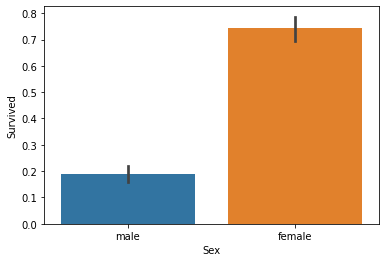

In [2]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)
plt.show()

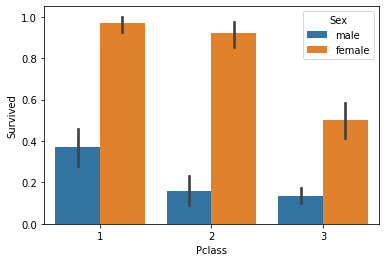

In [3]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

In [0]:
def get_category(age):
  cat=''
  if age<=-1: cat='Unkown'
  elif age<=5: cat='Baby'
  elif age<=12: cat='Child'
  elif age<=18: cat='Teenager'
  elif age<=25: cat='Student'
  elif age<=35: cat='Young Adult'
  elif age<=60: cat='Adult'
  else: cat='elderly'

  return cat

plt.figure(figsize=(10,6))

group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)

In [0]:
from sklearn import preprocessing

def encode_features(dataDF):
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=preprocessing.LabelEncoder()
    le.fit(dataDF[feature])
    dataDF[feature]=le.transform(dataDF[feature])
  
  return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


In [0]:
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0,inplace=True)
  return df

def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
  return df

def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=LabelEncoder()
    le=le.fit(df[feature])
    df[feature]=le.transform(df[feature])
  return df

def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

In [0]:
titanic_df=pd.read_csv('./train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)

X_titanic_df=transform_features(X_titanic_df)

In [0]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [0]:
dt_clf=DecisionTreeClassifier()
rf_clf=RandomForestClassifier()
lr_clf=LogisticRegression()

In [67]:
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도:{0:.4f}'.format(np.round(accuracy_score(y_test,dt_pred),4)))

rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(x_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(np.round(accuracy_score(y_test,rf_pred),4)))

lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(x_test)
print('LogisticRegression정확도:{0:.4f}'.format(np.round(accuracy_score(y_test,lr_pred),4)))

DecisionTreeClassifier 정확도:0.8045
RandomForestClassifier 정확도:0.8603
LogisticRegression정확도:0.8492


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
from sklearn.model_selection import KFold

In [71]:
def exec_kfold(clf,folds=5):
  kfold=KFold(n_splits=folds)
  scores=[]

  for iter_count,(train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
    X_train,x_test=X_titanic_df.values[train_index],X_titanic_df.values[test_index]
    y_train,y_test=y_titanic_df.values[train_index],y_titanic_df.values[test_index]

    clf.fit(X_train,y_train)
    predictions=clf.predict(x_test)
    accuracy=accuracy_score(y_test,predictions)
    scores.append(accuracy)
    print('교차검증 {0} 정확도:{1:.4f}'.format(iter_count,accuracy))

  mean_score=np.mean(scores)
  print('평균 정확도:{0:.4f}'.format(mean_score))

exec_kfold(dt_clf,folds=5)

교차검증 0 정확도:0.7598
교차검증 1 정확도:0.7809
교차검증 2 정확도:0.7921
교차검증 3 정확도:0.7753
교차검증 4 정확도:0.8258
평균 정확도:0.7868


In [74]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count,accuracy in enumerate(scores):
  print('교차검증 {0} 정확도:{1:.4f}'.format(iter_count,accuracy))

print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

교차검증 0 정확도:0.7598
교차검증 1 정확도:0.7865
교차검증 2 정확도:0.7978
교차검증 3 정확도:0.7809
교차검증 4 정확도:0.8371
평균 정확도:0.7924


In [75]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10],
            'min_samples_split':[2,3,5],
            'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf,param_grid=parameters,cv=5,scoring='accuracy',refit=True)
grid_dclf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 5, 10],
                         

In [76]:
print('GridSearchCV 최적 파라미터:',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dclf.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.7992


In [77]:
estimator=grid_dclf.best_estimator_

pred=estimator.predict(x_test)
print('테스트 세트 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 세트 정확도:0.8715
